,CasosDia,Temp. Ins. (C),Umi. Ins. (%),Chuva (mm),CasosDiasTarget
Data,,,,,
2020-03-22,3,26.616667,42.500000,4.453936,4
2020-03-23,3,26.462500,52.833333,4.453936,2
2020-03-24,3,24.812500,64.541667,8.800000,2
2020-03-25,1,22.008333,82.000000,28.800000,2
2020-03-26,0,21.225000,83.666667,0.200000,3
...,...,...,...,...,...
2023-12-27,8,22.787500,80.750000,4.453936,3
2023-12-28,4,24.291667,70.416667,4.453936,6
2023-12-29,7,25.687500,69.083333,4.453936,6


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1380 entries, 2020-03-22 to 2023-12-31
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CasosDia         1380 non-null   int64  
 1   Temp. Ins. (C)   1380 non-null   float64
 2   Umi. Ins. (%)    1380 non-null   float64
 3   Chuva (mm)       1380 non-null   float64
 4   CasosDiasTarget  1380 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 64.7 KB


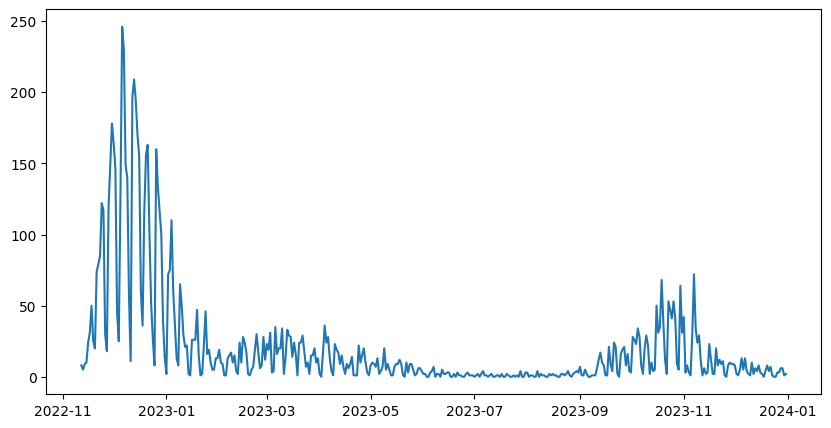

In [1]:
##IMPORTANDO

#from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
from scipy.stats import mannwhitneyu
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR 
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from scipy.stats import mannwhitneyu
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# Evitar avisos
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("planilhas/dfDias7desloc.csv", sep=';', parse_dates=['Data'], index_col="Data")
display(df)
df.info()

split = int(0.7 * len(df))
treino = df[:split]
teste = df[split:]


x_treino = treino.drop(columns='CasosDiasTarget')
y_treino = treino['CasosDiasTarget']

x_teste = teste.drop(columns='CasosDiasTarget')
y_teste = teste['CasosDiasTarget']

# Plotar as previsões em relação aos valores reais

plt.figure(figsize=(10, 5))
plt.plot(y_teste)



# SVR


In [2]:

# PEQUENO TESTE
param_grid_svr = {
    'C': [0.1, 0.5, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}


melhor_validacao_svr = 1000
best_params_svr = {}


for c in param_grid_svr['C']:
  for k in param_grid_svr['kernel']:
    svr = SVR(C=c, kernel=k)
    svr.fit(x_treino, y_treino)
    opiniao_svr = svr.predict(x_teste)

    mse_validacao_svr = mean_squared_error(y_teste, opiniao_svr)

    if mse_validacao_svr < melhor_validacao_svr:
        melhor_validacao_svr = mse_validacao_svr
        best_params_svr = {'C': c, 'kernel': k}
        print(mse_validacao_svr)
        print('passo aqui')




367.83105455775086
passo aqui


In [3]:
# SVR MESMO

mseSVR = []
rmseSVR= []
maeSVR= []


param_grid_svr = {
    'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'kernel': ['linear', 'poly', 'rbf'],
}

melhor_validacao_svr = float('inf')
best_params_svr = {}

parametrosSVR_C = []
parametrosSVR_Kernel = []

for j in range(20):
    print('Iteração:' + str(j+1))

    for c in param_grid_svr['C']:
        for k in param_grid_svr['kernel']:
            svr = SVR(C=c, kernel=k)
            svr.fit(x_treino, y_treino)
            opiniao_svr = svr.predict(x_teste)

            mse_validacao_svr = mean_squared_error(y_teste, opiniao_svr)
            #print(mse_validacao_svr)

            if mse_validacao_svr < melhor_validacao_svr:
                melhor_validacao_svr = mse_validacao_svr
                best_params_svr = {'C': c, 'kernel': k}


    print(melhor_validacao_svr)
    print(mse_validacao_svr)
    print(best_params_svr)

    svr = SVR(C=best_params_svr['C'], kernel=best_params_svr['kernel'])
    svr.fit(x_treino, y_treino)
    opiniao_svr = svr.predict(x_teste)

    mae = mean_absolute_error(y_teste, opiniao_svr).round(2)
    mse = mean_squared_error(y_teste, opiniao_svr).round(2)
    rmse = np.sqrt(mse).round(2)

    maeSVR.append(mae)
    mseSVR.append(mse)
    rmseSVR.append(rmse)

    parametrosSVR_C.append(best_params_svr['C'])
    parametrosSVR_Kernel.append(best_params_svr['kernel'])

# RESULTADOS !!!!
maxSVR_c = max(set(parametrosSVR_C), key=parametrosSVR_C.count)
maxSVR_k = max(set(parametrosSVR_Kernel), key=parametrosSVR_Kernel.count)

media_maeSVR = np.mean(maeSVR)
media_mseSVR = np.mean(mseSVR)
media_rmseSVR = np.mean(rmseSVR)

parametrosSVR_C.append(maxSVR_c)
parametrosSVR_Kernel.append(maxSVR_k)

maeSVR.append(media_maeSVR)
mseSVR.append(media_mseSVR)
rmseSVR.append(media_rmseSVR)

dfSVR = pd.DataFrame({
    'C': parametrosSVR_C,
    'kernel': parametrosSVR_Kernel,
    'MAE': maeSVR,
    'MSE': mseSVR,
    'RMSE': rmseSVR
})

print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")
display(dfSVR)
dfSVR.to_csv('resultadosModelos/dfSVR.csv', sep = ';', index = False, encoding='UTF-8')


Iteração:1
367.83105455775086
405.97285589368437
{'C': 0.1, 'kernel': 'linear'}
Iteração:2
367.83105455775086
405.97285589368437
{'C': 0.1, 'kernel': 'linear'}
Iteração:3
367.83105455775086
405.97285589368437
{'C': 0.1, 'kernel': 'linear'}
Iteração:4
367.83105455775086
405.97285589368437
{'C': 0.1, 'kernel': 'linear'}
Iteração:5
367.83105455775086
405.97285589368437
{'C': 0.1, 'kernel': 'linear'}
Iteração:6
367.83105455775086
405.97285589368437
{'C': 0.1, 'kernel': 'linear'}
Iteração:7
367.83105455775086
405.97285589368437
{'C': 0.1, 'kernel': 'linear'}
Iteração:8
367.83105455775086
405.97285589368437
{'C': 0.1, 'kernel': 'linear'}
Iteração:9
367.83105455775086
405.97285589368437
{'C': 0.1, 'kernel': 'linear'}
Iteração:10
367.83105455775086
405.97285589368437
{'C': 0.1, 'kernel': 'linear'}
Iteração:11
367.83105455775086
405.97285589368437
{'C': 0.1, 'kernel': 'linear'}
Iteração:12
367.83105455775086
405.97285589368437
{'C': 0.1, 'kernel': 'linear'}
Iteração:13
367.83105455775086
405.97

,C,kernel,MAE,MSE,RMSE
0,0.1,linear,10.23,367.83,19.18
1,0.1,linear,10.23,367.83,19.18
2,0.1,linear,10.23,367.83,19.18
3,0.1,linear,10.23,367.83,19.18
4,0.1,linear,10.23,367.83,19.18
5,0.1,linear,10.23,367.83,19.18
6,0.1,linear,10.23,367.83,19.18
7,0.1,linear,10.23,367.83,19.18
8,0.1,linear,10.23,367.83,19.18
9,0.1,linear,10.23,367.83,19.18


In [4]:
print(melhor_validacao_svr)

367.83105455775086


DatetimeIndex(['2022-11-12', '2022-11-13', '2022-11-14', '2022-11-15',
               '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-19',
               '2022-11-20', '2022-11-21',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', name='Data', length=415, freq=None)


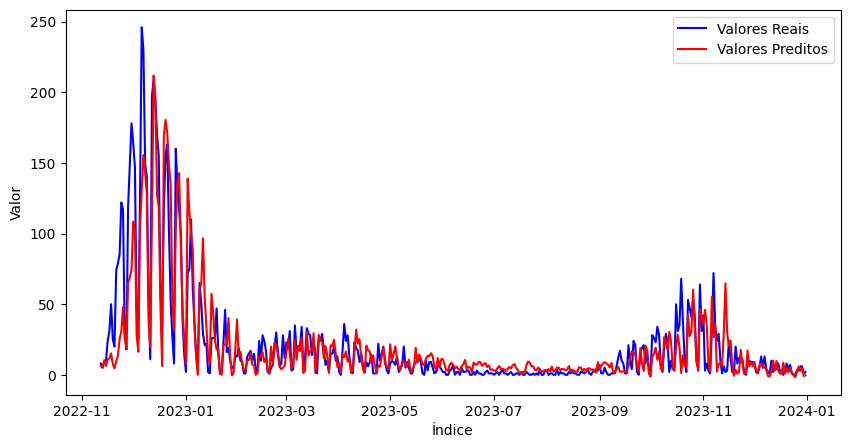

In [5]:
len(opiniao_svr)

print(x_teste.index)

serie_SVR = pd.Series(opiniao_svr, index=x_teste.index)


plt.figure(figsize=(10, 5))
plt.plot(y_teste, label='Valores Reais', color='blue', linewidth=.9)
plt.plot(serie_SVR, label='Valores Preditos', color='red', linewidth=.9)
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()

# MLP


In [6]:
#MLP


mseMLP = []
rmseMLP= []
maeMLP= []

p_MlpHiddenLayer = []
p_MlpActivation  = []
p_MlpMaxIter = []
p_MlpLearningRate  = []



print("MLP")
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (30,)],
    'activation': ['relu', 'logistic', 'tanh', 'identity'],
    'solver': ['adam'],
    'max_iter': [100, 200, 300],
    'learning_rate_init': [0.001, 0.01, 0.1]
}
melhor_validacao_mlp = 1000
best_paramsMLP = {}





for i in range(20):
    print(i+1)
    for hidden_layer_sizes in param_grid['hidden_layer_sizes']:
        for activation in param_grid['activation']:
            for max_iter in param_grid['max_iter']:
                for learning_rate_init in param_grid['learning_rate_init']:
                    mlp = MLPRegressor(
                        hidden_layer_sizes=hidden_layer_sizes,
                        activation=activation,
                        solver='adam',
                        max_iter=max_iter,
                        learning_rate_init=learning_rate_init
                    )
                    mlp.fit(x_treino, y_treino)
                    opiniao = mlp.predict(x_teste)
                    mse_validacao_mlp = mean_squared_error(y_teste, opiniao)
                    
                    if (mse_validacao_mlp < melhor_validacao_mlp):
                        melhor_validacao_mlp = mse_validacao_mlp
                        best_paramsMLP = {
                            'hidden_layer_sizes': hidden_layer_sizes,
                            'activation': activation,
                            'max_iter': max_iter,
                            'learning_rate_init': learning_rate_init
                        }


    print(melhor_validacao_mlp)
    print(mse_validacao_mlp)
    print(best_paramsMLP)

    mlp = MLPRegressor(
                    hidden_layer_sizes=best_paramsMLP['hidden_layer_sizes'],
                    activation=best_paramsMLP['activation'],
                    solver='adam',
                    max_iter=best_paramsMLP['max_iter'],
                    learning_rate_init=best_paramsMLP['learning_rate_init']
                )
    
    mlp.fit(x_treino, y_treino)
    opiniao_mlp = mlp.predict(x_teste)

    mae = mean_absolute_error(y_teste, opiniao_mlp).round(2)
    mse = mean_squared_error(y_teste, opiniao_mlp).round(2)
    rmse = np.sqrt(mse).round(2)

    maeMLP.append(mae)
    mseMLP.append(mse)
    rmseMLP.append(rmse)

    parametrosSVR_C.append(best_params_svr['C'])
    parametrosSVR_Kernel.append(best_params_svr['kernel'])

    p_MlpHiddenLayer.append(best_paramsMLP['hidden_layer_sizes'])
    p_MlpActivation.append(best_paramsMLP['activation'])
    p_MlpMaxIter.append(best_paramsMLP['max_iter'])
    p_MlpLearningRate.append(best_paramsMLP['learning_rate_init'])

# RESULTADOS !!!!
maxp_MlpHiddenLayer = max(set(p_MlpHiddenLayer), key=p_MlpHiddenLayer.count)
maxp_MlpActivation = max(set(p_MlpActivation), key=p_MlpActivation.count)
maxp_MlpMaxIter = max(set(p_MlpMaxIter), key=p_MlpMaxIter.count)
maxp_MlpLearningRate = max(set(p_MlpLearningRate), key=p_MlpLearningRate.count)


media_maeMLP = np.mean(maeMLP)
media_mseMLP = np.mean(mseMLP)
media_rmseMLP = np.mean(rmseMLP)

p_MlpHiddenLayer.append(maxp_MlpHiddenLayer)
p_MlpActivation.append(p_MlpActivation)
p_MlpMaxIter.append(p_MlpMaxIter)
p_MlpLearningRate.append(p_MlpLearningRate)

maeMLP.append(media_maeMLP)
mseMLP.append(media_mseMLP)
rmseMLP.append(media_rmseMLP)

dfMLP = pd.DataFrame({
    'hidden_layer_sizes':p_MlpHiddenLayer,
    'activation':p_MlpActivation,
    'max_iter':p_MlpMaxIter,
    'learning_rate_init':p_MlpLearningRate,
    'MAE': maeMLP,
    'MSE': mseMLP,
    'RMSE': rmseMLP
})

print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")
display(dfMLP)
dfMLP.to_csv('resultadosModelos/dfMLP.csv', sep = ';', index = False, encoding='UTF-8')


MLP
1
377.9738715831551
383.24332432198247
{'hidden_layer_sizes': (30,), 'activation': 'relu', 'max_iter': 100, 'learning_rate_init': 0.1}
2
371.80336699965017
519.7516310756213
{'hidden_layer_sizes': (30,), 'activation': 'relu', 'max_iter': 200, 'learning_rate_init': 0.1}
3
371.80336699965017
528.6345702316464
{'hidden_layer_sizes': (30,), 'activation': 'relu', 'max_iter': 200, 'learning_rate_init': 0.1}
4
371.80336699965017
703.5305009688104
{'hidden_layer_sizes': (30,), 'activation': 'relu', 'max_iter': 200, 'learning_rate_init': 0.1}
5
371.80336699965017
536.5018646761467
{'hidden_layer_sizes': (30,), 'activation': 'relu', 'max_iter': 200, 'learning_rate_init': 0.1}
6
371.80336699965017
439.9122022247036
{'hidden_layer_sizes': (30,), 'activation': 'relu', 'max_iter': 200, 'learning_rate_init': 0.1}
7
367.9621780621027
654.0201874760062
{'hidden_layer_sizes': (30,), 'activation': 'tanh', 'max_iter': 200, 'learning_rate_init': 0.01}
8
367.9621780621027
406.9257710602097
{'hidden_laye

,hidden_layer_sizes,activation,max_iter,learning_rate_init,MAE,MSE,RMSE
0,"(30,)",relu,100,0.1,12.140,414.140,20.350
1,"(30,)",relu,200,0.1,15.830,473.430,21.760
2,"(30,)",relu,200,0.1,14.340,453.770,21.300
3,"(30,)",relu,200,0.1,11.700,410.580,20.260
4,"(30,)",relu,200,0.1,17.110,501.890,22.400
5,"(30,)",relu,200,0.1,11.450,399.120,19.980
6,"(30,)",tanh,200,0.01,17.100,496.750,22.290
7,"(30,)",tanh,200,0.01,14.790,455.440,21.340
8,"(30,)",tanh,200,0.01,14.780,423.610,20.580
9,"(30,)",tanh,200,0.01,14.130,451.440,21.250


DatetimeIndex(['2022-11-12', '2022-11-13', '2022-11-14', '2022-11-15',
               '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-19',
               '2022-11-20', '2022-11-21',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', name='Data', length=415, freq=None)


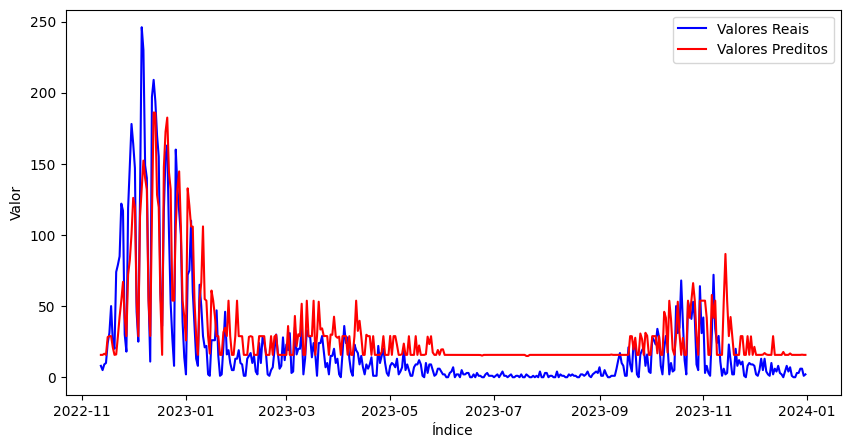

In [7]:
len(opiniao_mlp)

print(x_teste.index)

serie_MLP = pd.Series(opiniao_mlp, index=x_teste.index)


plt.figure(figsize=(10, 5))
plt.plot(y_teste, label='Valores Reais', color='blue')
plt.plot(serie_MLP, label='Valores Preditos', color='red')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()